In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("nasdaq100.csv", sep=';')

In [3]:
df.head()

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700


In [4]:
df.isnull().sum()

Date              0
Starting (USD)    0
Ending (USD)      0
dtype: int64

### We don't nedd date column, so let's delete it

In [5]:
df = df.drop(columns = ['Date'])

In [6]:
df.head()

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700


### Let's Visualize the data

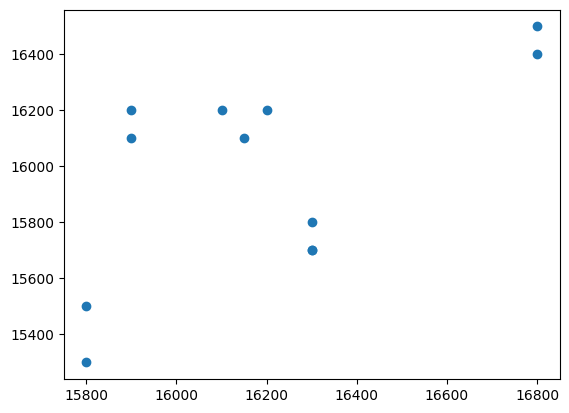

In [7]:
plt.scatter(df['Starting (USD)'] , df['Ending (USD)'])

### Now we are entering to the ML

### we separate x & Y

In [8]:
x = df.drop('Ending (USD)', axis=1)

In [9]:
x.head()

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300


In [10]:
y = df[['Ending (USD)']]
y.head()

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700


Let's check the mean value

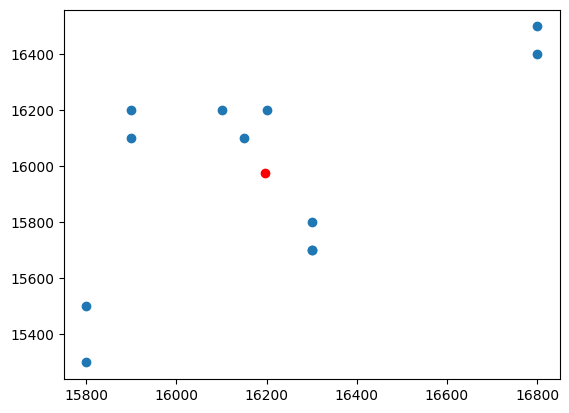

In [11]:
plt.scatter(x.mean() , y.mean(), color='red')
plt.scatter(df['Starting (USD)'] , df['Ending (USD)'])

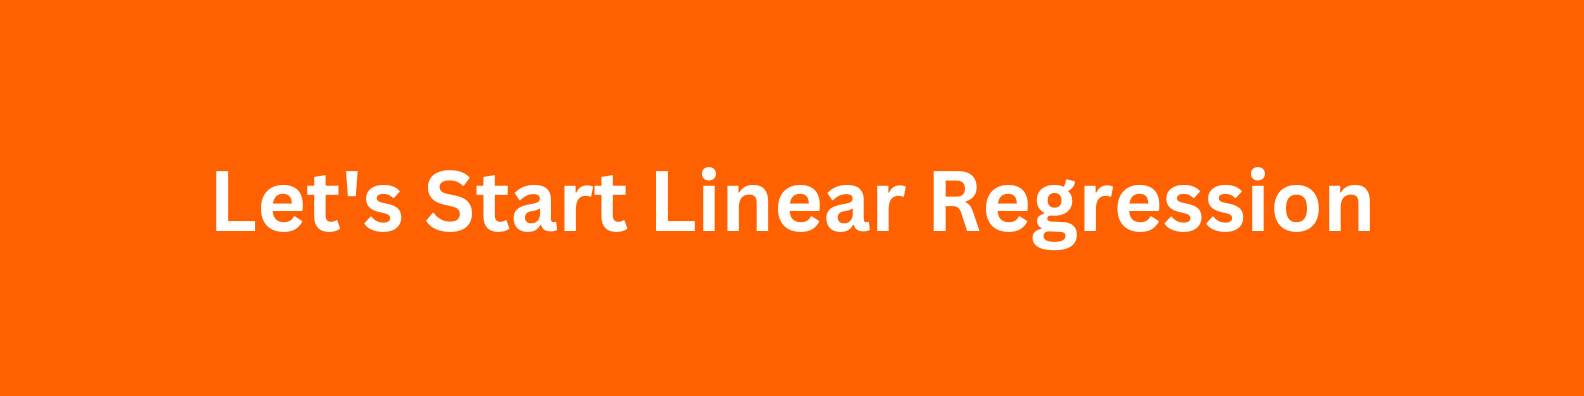

Google it "linear regression sklearn"

And import LinearRegression

In [12]:
from sklearn.linear_model import LinearRegression

Let's create an object

In [13]:
reg = LinearRegression()

Let's train the ml model

In [14]:
reg.fit(x, y)

LinearRegression()

Let's predict

In [15]:
reg.predict([[16700]])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16304.0105628]])

Heyy we got it🥳

In [16]:
df['Predicted_y'] = reg.predict(x)
df.head()

,Starting (USD),Ending (USD),Predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389


Let's check our prediction

Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

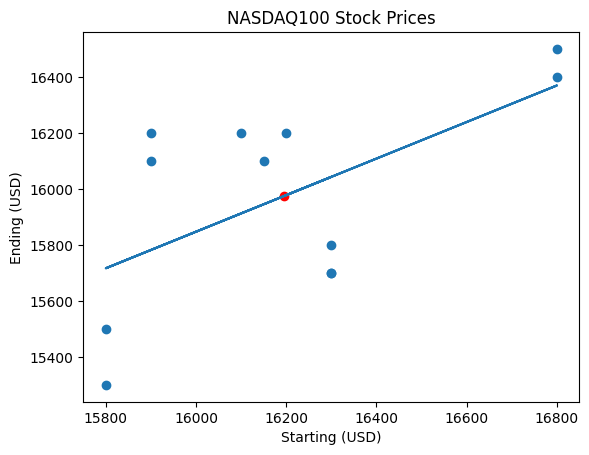

In [17]:
plt.plot(x, reg.predict(x))
plt.scatter(x.mean() , y.mean(), color='red')
plt.scatter(df['Starting (USD)'] , df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 Stock Prices')

It is matched🥳

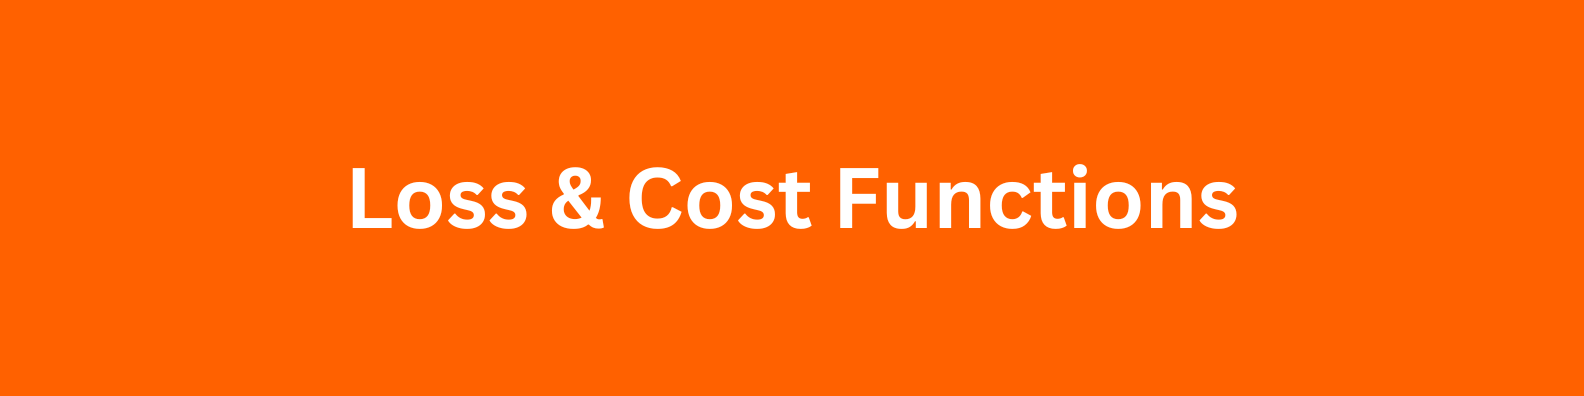

Loss function: Error for a single data point.

Cost function: Average error for all data points.

In [18]:
df.head()

,Starting (USD),Ending (USD),Predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389


In [19]:
df['loss'] = df['Ending (USD)'] - df['Predicted_y']

In [20]:
df.head()

,Starting (USD),Ending (USD),Predicted_y,loss
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198
4,16300,15700,16042.977389,-342.977389


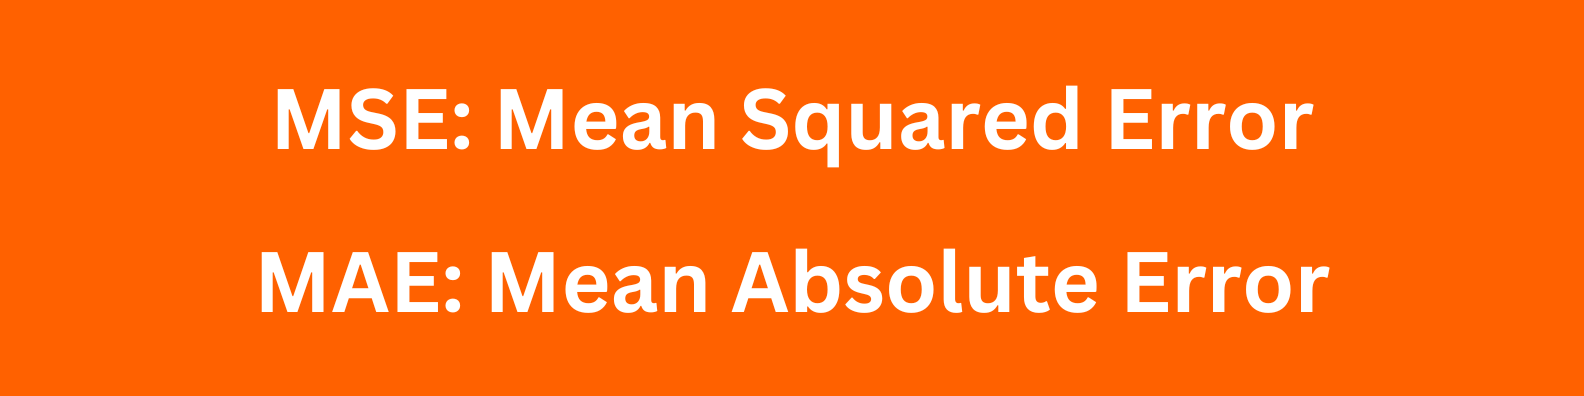

import using sk-learn documentation

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [22]:
mse = mean_squared_error(df['Ending (USD)'], df['Predicted_y'])
mse

80411.23397700385

In [23]:
mae = mean_absolute_error(df['Ending (USD)'], df['Predicted_y'])
mae

260.3840017604666

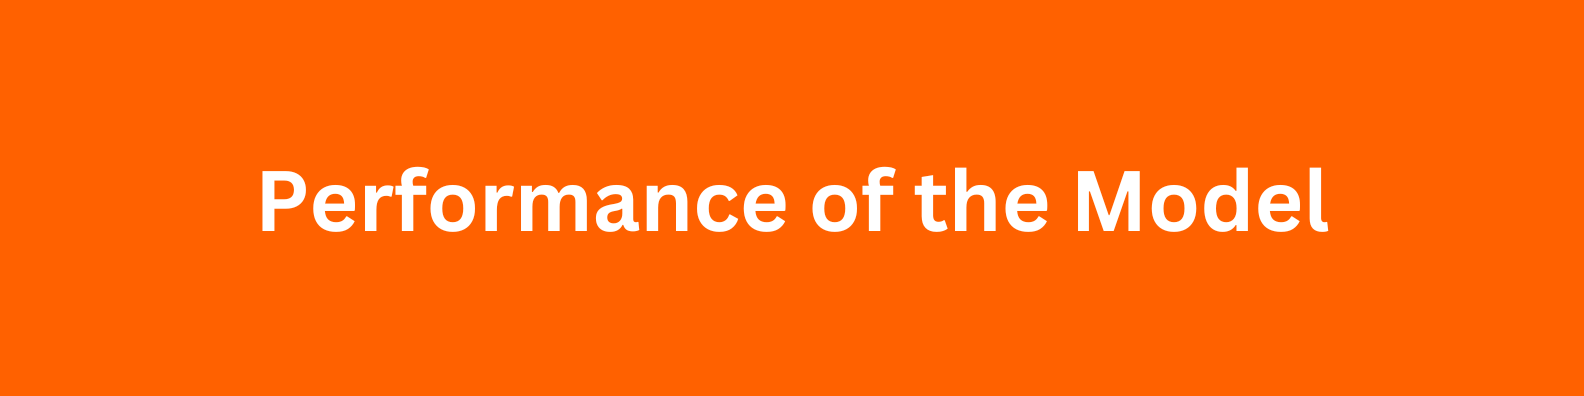

In [24]:
reg.score(x,y)

0.3577804940272571

it is 35%
but why

Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

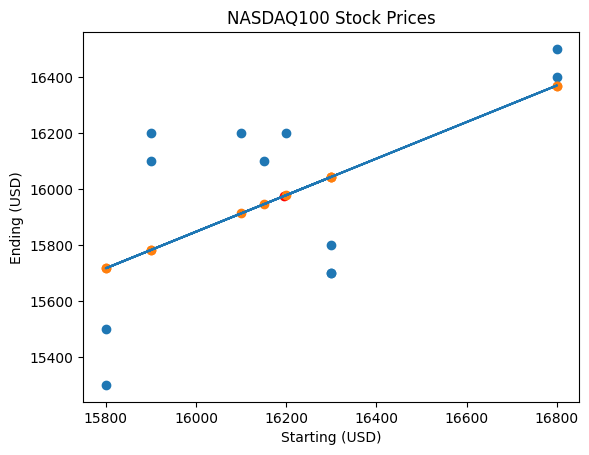

In [25]:
plt.plot(x, reg.predict(x))
plt.scatter(x.mean() , y.mean(), color='red')
plt.scatter(df['Starting (USD)'] , df['Ending (USD)'])
plt.scatter(df['Starting (USD)'] , reg.predict(x))
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 Stock Prices')

Because the difference of actual and prediction is very high

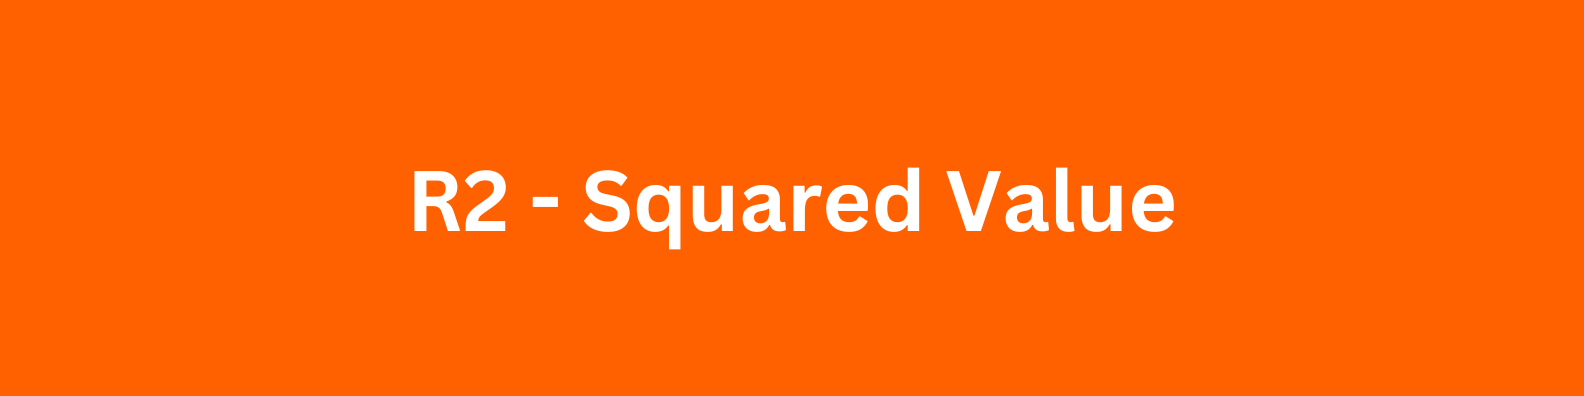

In [26]:
from sklearn.metrics import r2_score
r2_score(y, reg.predict(x))

0.3577804940272571

so, the error is 35%